In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


use ```encoding='Latin-1'``` to show 'Nou Camp - Estadio Le�n' as ‘Nou Camp - Estadio Leï¿½n’

In [2]:
match_df = pd.read_csv('../input/WorldCupMatches.csv', encoding='Latin-1')
player_df = pd.read_csv('../input/WorldCupPlayers.csv', encoding='Latin-1')
cup_df = pd.read_csv('../input/WorldCups.csv', encoding='Latin-1')

In [3]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [4]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [5]:
match_df.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [6]:
match_df.dropna(inplace=True)

In [7]:
match_df = match_df.replace('Germany FR', 'Germany')
cup_df.replace('Germany FR', 'Germany', inplace=True)

In [8]:
match_df['Year'] = match_df['Year'].astype('int')

In [9]:
cup_df['Attendance'] = cup_df['Attendance'].str.replace('.', '')

In [10]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [11]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


```match_df.groupby('Year')['Attendance'].sum()``` -> df.Series
```match_df.groupby('Year')['Attendance'].sum().to_frame()``` -> df, do not create new index
```match_df.groupby('Year')['Attendance'].sum().reset_index()``` -> df, make new index

In [12]:
match_df.groupby('Year')['Attendance'].sum().to_frame().head(3)

,Attendance
Year,
1930,590549.0
1934,363000.0
1938,375700.0


In [13]:
match_df.groupby('Year')['Attendance'].sum().reset_index().head(3)

,Year,Attendance
0,1930,590549.0
1,1934,363000.0
2,1938,375700.0


# 1.Attendance of each year

- bar - total
- line - average


## 1.1 Total attendance

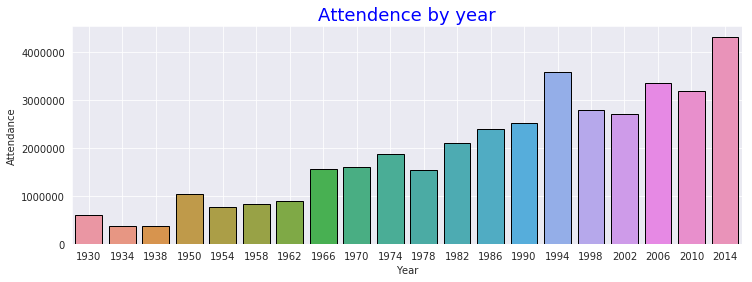

In [14]:
year_attend_df = match_df.groupby('Year')['Attendance'].sum().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=year_attend_df, x='Year', y='Attendance', linewidth=1, edgecolor='K')
plt.grid(True)
plt.title('Attendence by year', color='b', fontsize=18)
plt.show()

## 1.2 Average attendance

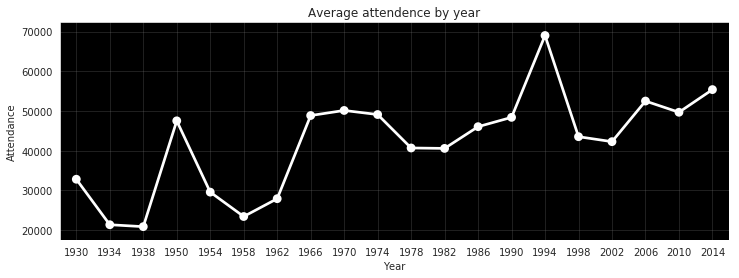

In [15]:
year_attend_mean_df = match_df.groupby('Year')['Attendance'].mean().reset_index()

plt.figure(figsize=(12,4))
ax = sns.pointplot(year_attend_mean_df['Year'], year_attend_mean_df['Attendance'], color='w')
ax.set_facecolor('k')
plt.grid(True, color='grey', alpha=0.3)
plt.title('Average attendence by year')
plt.show()

# 2.Total goal scores -> per country per cup [☆☆☆☆☆]

## 2.1 Total goals scored by year


```
# AttributeError: 'str' object has no attribute 'sqrt'

sns.scatterplot(data=cup_df, x='Year', y='GoalsScored', c=cup_df['GoalsScored'],cmap='inferno')
# always error, complicated compared to plt.scatter

plt.scatter(data=cup_df, x='Year', y='GoalsScored', c='GoalsScored', s='Attendance'*0.01)
#TypeError: can't multiply sequence by non-int of type 'float'
```

In [16]:
cup_df['Attendance'] = cup_df['Attendance'].astype('int')

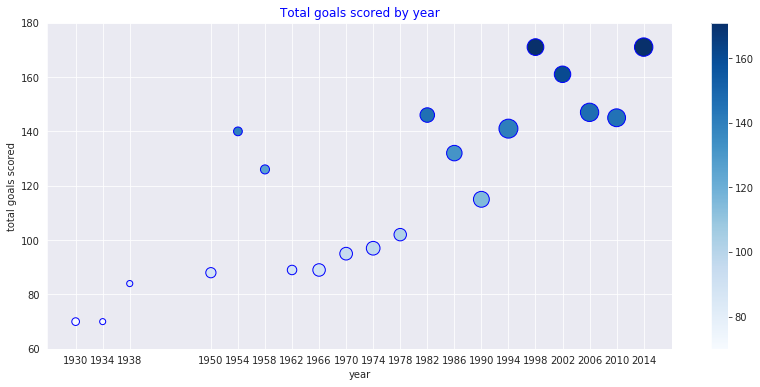

In [17]:
plt.figure(figsize=(14,6))
plt.scatter(data=cup_df, x='Year', y='GoalsScored', 
            c='GoalsScored', s=cup_df['Attendance']*0.0001, cmap='Blues',
            linewidth=1 ,edgecolor='blue')
plt.colorbar()
plt.xticks(cup_df['Year'].unique())
# with no plt.xticks, will generate only 4 ticks [1940,1960,1980,2000] not each year
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()
# gray_r,inferno, https://blog.csdn.net/Mr_Cat123/article/details/78638491

## 2.2 Total goals scored by country

In [18]:
home_df = match_df.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
home_df.columns = ['country', 'home_goals']
home_df.head()

,country,home_goals
0,Algeria,5.0
1,Angola,0.0
2,Argentina,111.0
3,Australia,7.0
4,Austria,31.0


In [19]:
away_df = match_df.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
away_df.columns = ['country', 'away_goals']
away_df.head()

,country,away_goals
0,Algeria,7.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0


In [20]:
country_goal_df = pd.merge(home_df, away_df, on='country', how='inner')
country_goal_df['total_goals'] = country_goal_df['home_goals']+country_goal_df['away_goals']
top_country_goal_df = country_goal_df.sort_values(by='total_goals',ascending=False)[:10]
top_country_goal_df.head()

,country,home_goals,away_goals,total_goals
25,Germany,164.0,67.0,231.0
7,Brazil,180.0,45.0,225.0
2,Argentina,111.0,22.0,133.0
34,Italy,99.0,29.0,128.0
23,France,68.0,40.0,108.0


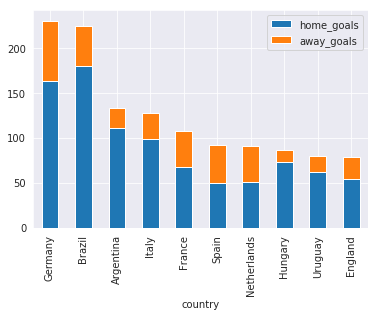

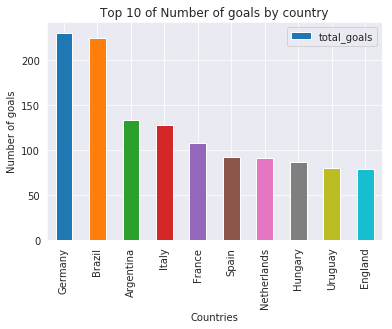

In [21]:
top_country_goal_df.head(10).plot(kind='bar', x='country', y=['home_goals','away_goals'], 
                                  stacked=True, )
plt.show()

top_country_goal_df.head(10).plot(kind='bar', x='country', y='total_goals')
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')
plt.show()

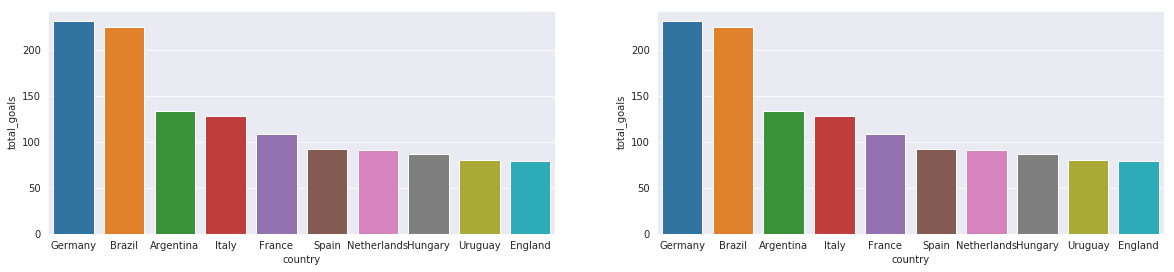

In [22]:
plt.figure(figsize=(20,4))
plt.subplot(121)
ax1 = sns.barplot(x='country', y='total_goals', data=top_country_goal_df)
plt.subplot(122)
ax2 = sns.barplot(x='country', y='total_goals', data=top_country_goal_df)
# sns.barplot needs hue to seperate 2 columns and plot

# ax2 = plt.plot(data=top_country_goal_df, x='country', height='home_goals') #height can't use multi-paras
# ax2 = top_country_goal_df.plot(kind='bar', stacked=True) # cannot involve in a subplot
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

# 3.Matches, Stadiums with Highest number of attendance
## 3.1 Match has the largest attendance

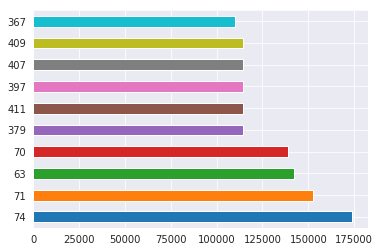

In [23]:
match_df.sort_values(by='Attendance', ascending=False)[:10]['Attendance'].plot(kind='barh')

In [24]:
top_attend_match_df = match_df.sort_values(by='Attendance',ascending=False)[:10]
top_attend_match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950,16 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950,13 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950,01 Jul 1950 - 15:00,Group 1,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG


In [25]:
top_attend_match_df['vs'] = top_attend_match_df['Home Team Name'].str.cat(top_attend_match_df['Away Team Name'], sep=' .vs. ')

In [26]:
top_attend_match_df['Match Team'] = top_attend_match_df['Home Team Name'] + ' .VS. ' + top_attend_match_df['Away Team Name']

In [27]:
top_attend_match_df['date'] = top_attend_match_df['Datetime'].str.split('-').str[0]
# data_df['col_1'].str.split('-').str[0]

In [28]:
top_attend_match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,vs,Match Team,date
74,1950,16 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA,Uruguay .vs. Brazil,Uruguay .VS. Brazil,16 Jul 1950
71,1950,13 Jul 1950 - 15:00,Group 6,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP,Brazil .vs. Spain,Brazil .VS. Spain,13 Jul 1950
63,1950,01 Jul 1950 - 15:00,Group 1,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG,Brazil .vs. Yugoslavia,Brazil .VS. Yugoslavia,01 Jul 1950


In [29]:
text = ' Stadium: ' + top_attend_match_df['Stadium'].str.split('-').str[0] + ', Date: ' + top_attend_match_df['date']

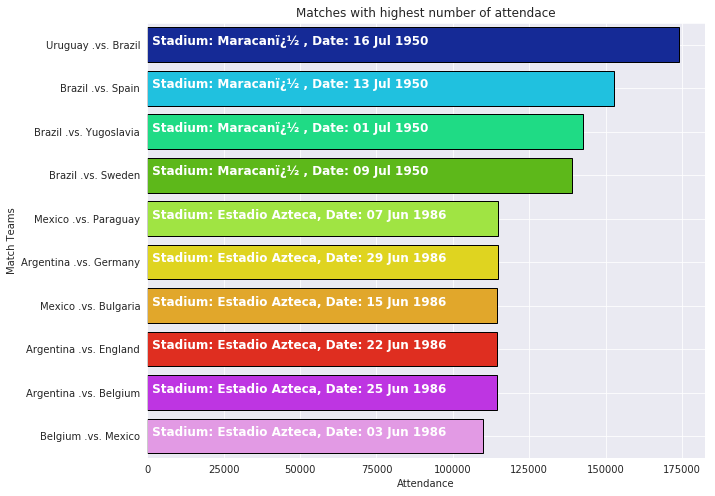

In [30]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=top_attend_match_df, x='Attendance', y='vs',palette='gist_ncar', 
            linewidth=1, edgecolor='k')
plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendace')
plt.grid(True)
for i,j in enumerate(text):
    ax.text(x=100,y=i,s=j, fontsize=12, color='w', weight='bold')
    
# ax.text(x, y, s, fontdict=None, withdash=False, **kwargs)

## 3.2 Stadium has the largest Attendance

- the city that stadium located
- ```str.split('-').str[0]```

In [31]:
attend_stadium_df = match_df.groupby(['Stadium','City'])['Attendance'].mean().reset_index()
attend_stadium_df.head(3)

,Stadium,City,Attendance
0,Arena Amazonia,Manaus,40056.75
1,Arena Fonte Nova,Salvador,50385.00
2,Arena Pantanal,Cuiaba,39679.25


In [32]:
top_attend_stadium_df = attend_stadium_df.sort_values('Attendance', ascending=False)[:10]
top_attend_stadium_df['Stadium_short'] = top_attend_stadium_df['Stadium'].str.split('-').str[0]
# for below test, create the stadium_short column
top_attend_stadium_df

,Stadium,City,Attendance,Stadium_short
99,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro,101692.625000,Maracanï¿½
32,Estadio Azteca,Mexico City,100923.684211,Estadio Azteca
137,Rose Bowl,Los Angeles,92600.875000,Rose Bowl
179,Wembley Stadium,London,86448.222222,Wembley Stadium
151,Soccer City Stadium,Johannesburg,83857.375000,Soccer City Stadium
146,Santiago Bernabeu,Madrid,82522.250000,Santiago Bernabeu
167,Stanford Stadium,San Francisco,81737.333333,Stanford Stadium
159,Stade de France,Saint-Denis,78222.222222,Stade de France
48,Estadio do Maracana,Rio De Janeiro,74197.100000,Estadio do Maracana
64,Giants Stadium,New York/New Jersey,73689.714286,Giants Stadium


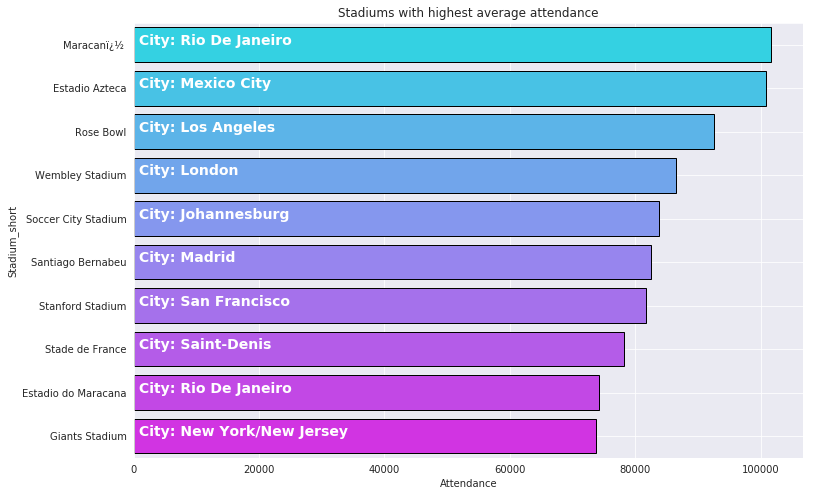

In [33]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_attend_stadium_df, x='Attendance', y='Stadium_short', linewidth=1, edgecolor='k', palette='cool')
for i,j in enumerate(' City: '+top_attend_stadium_df['City']):
    ax.text(100,i,j, fontsize=14, color='white', weight='bold')
plt.grid(True)
plt.title('Stadiums with highest average attendance')
plt.show()

So, how to get each stadium's location / city for visualization

there are 2ways to find stadiums' city, but really complicated!!!!

the simplest way is get the city name when you groupby

In [34]:
top_attend_stadium_df['Stadium'].tolist()

['Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho',
 'Estadio Azteca',
 'Rose Bowl',
 'Wembley Stadium',
 'Soccer City Stadium',
 'Santiago Bernabeu',
 'Stanford Stadium',
 'Stade de France',
 'Estadio do Maracana',
 'Giants Stadium']

In [35]:
match_df[match_df['Stadium'].isin(top_attend_stadium_df['Stadium'].tolist())][['Stadium','City']].drop_duplicates()
# can not use teh stadium name after split, or can not find its city name in the origin data_df

,Stadium,City
53,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro
168,Wembley Stadium,London
200,Estadio Azteca,Mexico City
347,Santiago Bernabeu,Madrid
467,Giants Stadium,New York/New Jersey
468,Rose Bowl,Los Angeles
473,Stanford Stadium,San Francisco
516,Stade de France,Saint-Denis
708,Soccer City Stadium,Johannesburg
782,Estadio do Maracana,Rio De Janeiro


In [36]:
match_df.loc[match_df['Stadium'].isin(top_attend_stadium_df['Stadium'].tolist())][['Stadium', 'City']].drop_duplicates()

,Stadium,City
53,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filho,Rio De Janeiro
168,Wembley Stadium,London
200,Estadio Azteca,Mexico City
347,Santiago Bernabeu,Madrid
467,Giants Stadium,New York/New Jersey
468,Rose Bowl,Los Angeles
473,Stanford Stadium,San Francisco
516,Stade de France,Saint-Denis
708,Soccer City Stadium,Johannesburg
782,Estadio do Maracana,Rio De Janeiro


# 4. Which countries had won the cup most?
## 4.1 which country got winner the most

- how many times got winner
- on  which year got winner

In [37]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


In [38]:
# cup_df.groupby(['Winner','Year'])['Winner'].count()

In [39]:
cup_df['Year'] = cup_df['Year'].astype('str')

In [40]:
# cup_df.groupby('Winner')['Year'].sum()

In [41]:
winner_year_df = cup_df.groupby('Winner')['Year'].apply(', '.join).reset_index()
# TypeError: sequence item 0: expected str instance, int found
winner_year_df.head()

,Winner,Year
0,Argentina,"1978, 1986"
1,Brazil,"1958, 1962, 1970, 1994, 2002"
2,England,1966
3,France,1998
4,Germany,"1954, 1974, 1990, 2014"


In [42]:
# winner_year_count_df = cup_df['Winner'].value_counts().reset_index()
# winner_year_count_df.columns = [['Winner','count']] # !!!!!
# ValueError: The column label 'Winner' is not unique.
# For a multi-index, the label must be a tuple with elements corresponding to each level.

winner_year_count_df = cup_df['Winner'].value_counts().reset_index()
winner_year_count_df.columns = ['Winner','count']
winner_year_count_df.head()

,Winner,count
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2


for merge together, need to rename and generate a foreigner_key

In [43]:
# way two
# winner_year_count_df = cup_df.groupby('Winner')['Year'].count().reset_index()
# winner_year_count_df.columns = ['Winner', 'count']

In [44]:
winner_year_merge_df = pd.merge(winner_year_df,winner_year_count_df, on='Winner', how='left')
winner_year_merge_df.sort_values(by='count', inplace=True, ascending=False)
winner_year_merge_df

,Winner,Year,count
1,Brazil,"1958, 1962, 1970, 1994, 2002",5
4,Germany,"1954, 1974, 1990, 2014",4
5,Italy,"1934, 1938, 1982, 2006",4
0,Argentina,"1978, 1986",2
7,Uruguay,"1930, 1950",2
2,England,1966,1
3,France,1998,1
6,Spain,2010,1


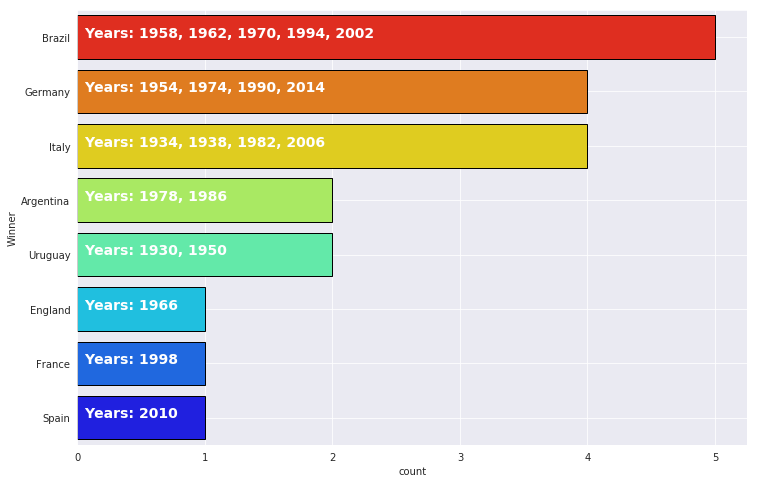

In [45]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=winner_year_merge_df, x='count', y='Winner', linewidth=1, edgecolor='k', palette='jet_r')
for i,j in enumerate('Years: '+winner_year_merge_df['Year']):
    ax.text(0.05, i,j, fontsize=14, color='white', weight='bold')
plt.grid(True)

## 4.2 결승전 Winner vs Runner-up count

In [46]:
winner_df = cup_df.Winner.value_counts().reset_index()
winner_df

,index,Winner
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2
5,France,1
6,Spain,1
7,England,1


In [47]:
runnerup_df = cup_df['Runners-Up'].value_counts().reset_index()
runnerup_df

,index,Runners-Up
0,Germany,4
1,Netherlands,3
2,Argentina,3
3,Czechoslovakia,2
4,Italy,2
5,Brazil,2
6,Hungary,2
7,Sweden,1
8,France,1


In [48]:
win_run_merge_df = pd.merge(winner_df, runnerup_df,on='index', how='outer')
win_run_merge_df

,index,Winner,Runners-Up
0,Brazil,5.0,2.0
1,Italy,4.0,2.0
2,Germany,4.0,4.0
3,Uruguay,2.0,NaN
4,Argentina,2.0,3.0
5,France,1.0,1.0
6,Spain,1.0,NaN
7,England,1.0,NaN
8,Netherlands,NaN,3.0
9,Czechoslovakia,NaN,2.0


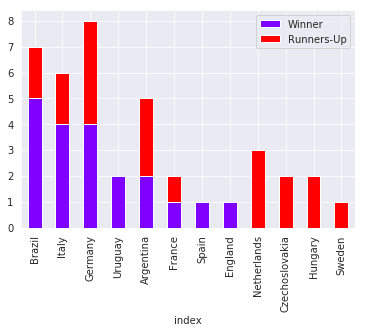

In [49]:
win_run_merge_df.plot(kind='bar', x='index',stacked=True, cmap='rainbow')

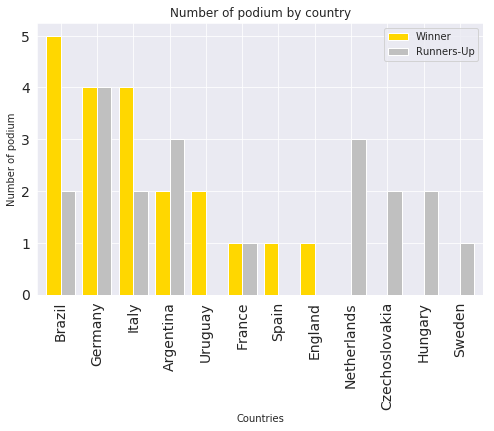

In [50]:
win_run_merge_df.sort_values(by=['Winner', 'Runners-Up'], ascending=False, inplace=True)
win_run_merge_df.plot(kind='bar', x='index', y=['Winner','Runners-Up'], color =['gold','silver'],
                     figsize=(8,5), fontsize=14, width=0.8, align='center')
# y 지정안해도됨
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')
plt.show()

In [51]:
winner_df['type'] = 'winner'
winner_df.columns = ['index','count','type']
runnerup_df['type'] = 'runner_up'
runnerup_df.columns = ['index','count','type']

In [52]:
winner_df

,index,count,type
0,Brazil,5,winner
1,Italy,4,winner
2,Germany,4,winner
3,Uruguay,2,winner
4,Argentina,2,winner
5,France,1,winner
6,Spain,1,winner
7,England,1,winner


In [53]:
runnerup_df

,index,count,type
0,Germany,4,runner_up
1,Netherlands,3,runner_up
2,Argentina,3,runner_up
3,Czechoslovakia,2,runner_up
4,Italy,2,runner_up
5,Brazil,2,runner_up
6,Hungary,2,runner_up
7,Sweden,1,runner_up
8,France,1,runner_up


In [54]:
win_run_df = pd.concat([winner_df, runnerup_df], axis=0, )
win_run_df

,index,count,type
0,Brazil,5,winner
1,Italy,4,winner
2,Germany,4,winner
3,Uruguay,2,winner
4,Argentina,2,winner
5,France,1,winner
6,Spain,1,winner
7,England,1,winner
0,Germany,4,runner_up
1,Netherlands,3,runner_up


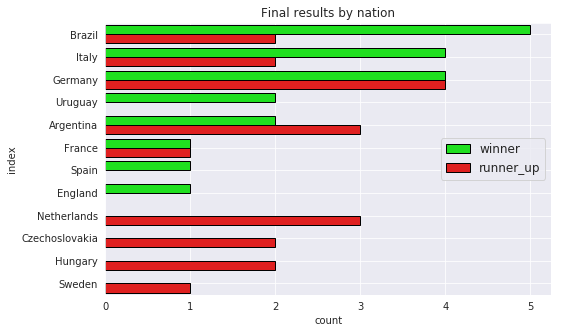

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data=win_run_df, x='count', y='index', hue='type',palette=['lime', 'r'], linewidth=1, edgecolor='k')
plt.legend(loc='center right' ,prop={'size':12})
plt.grid(True)
plt.title('Final results by nation')
plt.show()

# 5. Network  relationship graph

In [56]:
import networkx as nx

In [57]:
def network_graph(year,color):
    df = match_df[match_df['Year']==year][['Home Team Name', 'Away Team Name']]
    g = nx.from_pandas_edgelist(df, 'Home Team Name', 'Away Team Name')
    
    plt.figure(figsize=(16,9))
    nx.draw_kamada_kawai(g,with_labels=True,
                         node_size=2500,
                         node_color=color,
                         node_shape='s', # 's'
                         edgecolor='k',
                         linewidths=5,
                         font_size=12,
                         alpha=.8)
    plt.title('Interaction between teams: ' + str(year), fontsize=12)
    plt.show()

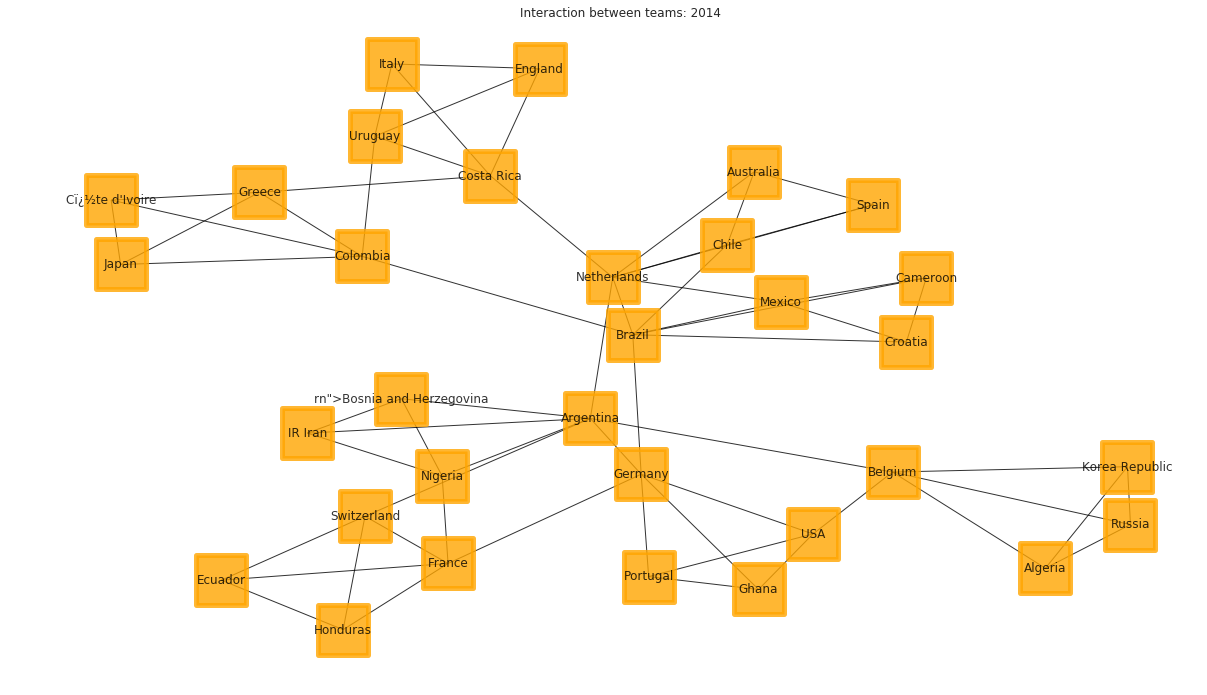

In [58]:
network_graph(2014,'Orange')

# 6. Goals per country per cup(year) Top5

In [59]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [60]:
match_df.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()

Year  Home Team Name            
1930  Argentina                     16.0
      Brazil                         4.0
      Chile                          4.0
      France                         4.0
      Paraguay                       1.0
      Romania                        3.0
      USA                            6.0
      Uruguay                       15.0
      Yugoslavia                     6.0
1934  Austria                        5.0
      Czechoslovakia                 8.0
      Germany                       10.0
      Hungary                        4.0
      Italy                         12.0
      Spain                          3.0
      Sweden                         3.0
      Switzerland                    3.0
1938  Brazil                        13.0
      Cuba                           5.0
      Czechoslovakia                 3.0
      France                         3.0
      Hungary                       13.0
      Italy                         11.0
      Sweden            

### take ```reset_index()``` with a healthy grain of salt!

In [61]:
home_year_goal = match_df.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()

In [62]:
away_year_goal = match_df.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()

In [64]:
# country_cup_goal_df = pd.merge(home_year_goal_df,away_year_goal_df,how='outer')

country_cup_goal_df = pd.concat([home_year_goal,away_year_goal],axis=1)
country_cup_goal_df['total'] = country_cup_goal_df['Home Team Goals'] + country_cup_goal_df['Away Team Goals']
country_cup_goal_df

Home Team Goals  Away Team Goals  total
1930 Argentina                              16.0              2.0   18.0
     Belgium                                 NaN              0.0    NaN
     Bolivia                                 NaN              0.0    NaN
     Brazil                                  4.0              1.0    5.0
     Chile                                   4.0              1.0    5.0
     France                                  4.0              0.0    4.0
     Mexico                                  NaN              4.0    NaN
     Paraguay                                1.0              0.0    1.0
     Peru                                    NaN              1.0    NaN
     Romania                                 3.0              0.0    3.0
     USA                                     6.0              1.0    7.0
     Uruguay                                15.0              NaN    NaN
     Yugoslavia                              6.0              1.0    7.0
1934 Argentina                               NaN              2.0    NaN
     Austria                                 5.0              2.0    7.0
     Belgium                                 NaN              2.0    NaN
     Brazil                                  NaN              1.0    NaN
     Czechoslovakia                          8.0              1.0    9.0
     Egypt                                   NaN              2.0    NaN
     France                                  NaN              2.0    NaN
     Germany                                10.0              1.0   11.0
     Hungary                                 4.0              1.0    5.0
     Italy                                  12.0              NaN    NaN
     Netherlands                             NaN              2.0    NaN
     Romania                                 NaN              1.0    NaN
     Spain                                   3.0              1.0    4.0
     Sweden                                  3.0              1.0    4.0
     Switzerland                             3.0              2.0    5.0
     USA                                     NaN              1.0    NaN
1938 Belgium                                 NaN              1.0    NaN
...                                          ...              ...    ...
2014 Australia                               2.0              1.0    3.0
     Belgium                                 7.0              1.0    8.0
     Brazil                                 11.0              4.0   15.0
     Cameroon                                1.0              0.0    1.0
     Chile                                   3.0              4.0    7.0
     Colombia                                9.0              6.0   15.0
     Costa Rica                              2.0              4.0    6.0
     Croatia                                 1.0              5.0    6.0
     Cï¿½te d'Ivoire                         2.0              2.0    4.0
     Ecuador                                 0.0              3.0    3.0
     England                                 1.0              1.0    2.0
     France                                  7.0              5.0   12.0
     Germany                                 8.0             17.0   25.0
     Ghana                                   1.0              3.0    4.0
     Greece                                  2.0              2.0    4.0
     Honduras                                1.0              0.0    1.0
     IR Iran                                 0.0              1.0    1.0
     Italy                                   0.0              2.0    2.0
     Japan                                   1.0              1.0    2.0
     Korea Republic                          2.0              1.0    3.0
     Mexico                                  1.0              5.0    6.0
     Netherlands                             6.0             14.0   20.0
     Nigeria                                 3.0              0.0    3.0
     Portugal     

In [65]:
type(country_cup_goal_df)

pandas.core.frame.DataFrame

In [66]:
country_cup_goal_df = country_cup_goal_df.reset_index()

In [67]:
country_cup_goal_df.columns = ['year','country','home_goal','away_goal','total_goal']
country_cup_goal_df

,year,country,home_goal,away_goal,total_goal
0,1930,Argentina,16.0,2.0,18.0
1,1930,Belgium,NaN,0.0,NaN
2,1930,Bolivia,NaN,0.0,NaN
3,1930,Brazil,4.0,1.0,5.0
4,1930,Chile,4.0,1.0,5.0
5,1930,France,4.0,0.0,4.0
6,1930,Mexico,NaN,4.0,NaN
7,1930,Paraguay,1.0,0.0,1.0
8,1930,Peru,NaN,1.0,NaN
9,1930,Romania,3.0,0.0,3.0


In [68]:
country_cup_goal_df.sort_values(by=['year','total_goal'], ascending=[True,False], inplace=True)

In [69]:
country_cup_goal_df.head()

,year,country,home_goal,away_goal,total_goal
0,1930,Argentina,16.0,2.0,18.0
10,1930,USA,6.0,1.0,7.0
12,1930,Yugoslavia,6.0,1.0,7.0
3,1930,Brazil,4.0,1.0,5.0
4,1930,Chile,4.0,1.0,5.0


In [70]:
top_country_cup_goal_df = country_cup_goal_df.groupby('year').head(5)
top_country_cup_goal_df

,year,country,home_goal,away_goal,total_goal
0,1930,Argentina,16.0,2.0,18.0
10,1930,USA,6.0,1.0,7.0
12,1930,Yugoslavia,6.0,1.0,7.0
3,1930,Brazil,4.0,1.0,5.0
4,1930,Chile,4.0,1.0,5.0
20,1934,Germany,10.0,1.0,11.0
17,1934,Czechoslovakia,8.0,1.0,9.0
14,1934,Austria,5.0,2.0,7.0
21,1934,Hungary,4.0,1.0,5.0
27,1934,Switzerland,3.0,2.0,5.0


In [71]:
# country_cup_goal_df.plot(kind='bar', stacked=True, x='country',y='total_goal',hue='year')
# sns.barplot(data=top_country_cup_goal_df, x='year',y='total_goal',hue='country')

# can plot with multi y, not multi x

In [72]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [73]:
top_country_cup_goal_df['country'].drop_duplicates()

0           Argentina
10                USA
12         Yugoslavia
3              Brazil
4               Chile
20            Germany
17     Czechoslovakia
14            Austria
21            Hungary
27        Switzerland
42             Sweden
31               Cuba
51              Spain
71            Uruguay
78             France
83           Paraguay
100      Soviet Union
116          Portugal
114         Korea DPR
129             Italy
132              Peru
130            Mexico
147            Poland
146       Netherlands
196           Belgium
227           England
222          Cameroon
246          Bulgaria
258           Romania
287           Nigeria
326            Turkey
312    Korea Republic
402          Colombia
Name: country, dtype: object

In [74]:
# x, y = country_cup_goal_df['year'].values, country_cup_goal_df['total_goal'].values

data= []

# each country will appewar at which year and got how many goals?
for country in top_country_cup_goal_df['country'].drop_duplicates().values :
    year = top_country_cup_goal_df[top_country_cup_goal_df['country'] == country]['year']
    goals = top_country_cup_goal_df[top_country_cup_goal_df['country'] == country]['total_goal']
    data.append(
        go.Bar(
            x=year,
            y=goals,
            name = country,
        )
    )

layout = go.Layout(
    barmode = "stack", 
    title = "Top 5 teams which scored the most goals",
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pyplot-fifa')

In [75]:
data

[Bar({
     'name': 'Argentina',
     'x': array([1930, 1974, 1978, 1986, 1998, 2006, 2010], dtype=int32),
     'y': array([18.,  9., 15., 14., 10., 11., 10.])
 }), Bar({
     'name': 'USA', 'x': array([1930], dtype=int32), 'y': array([7.])
 }), Bar({
     'name': 'Yugoslavia', 'x': array([1930, 1950, 1962, 1974, 1990], dtype=int32), 'y': array([ 7.,  7., 10., 12.,  8.])
 }), Bar({
     'name': 'Brazil',
     'x': array([1930, 1938, 1950, 1978, 1982, 1994, 2002, 2006, 2010, 2014], dtype=int32),
     'y': array([ 5., 14., 22., 10., 15., 11., 18., 10.,  9., 15.])
 }), Bar({
     'name': 'Chile', 'x': array([1930, 1950, 1962], dtype=int32), 'y': array([ 5.,  5., 10.])
 }), Bar({
     'name': 'Germany',
     'x': array([1934, 1954, 1958, 1966, 1970, 1974, 1978, 1982, 2002, 2006, 2010, 2014],
                dtype=int32),
     'y': array([11., 25., 12., 15., 17., 13., 10., 12., 14., 14., 16., 25.])
 }), Bar({
     'name': 'Czechoslovakia',
     'x': array([1934, 1938, 1958, 1962, 1990], dty

In [76]:
# a = country_cup_goal_df.sort_values('total_goal', ascending=False)
# a.head()

In [77]:
country_cup_goal_df.drop(['home_goal', 'away_goal'], axis=1, inplace=True)
country_cup_goal_df

,year,country,total_goal
0,1930,Argentina,18.0
10,1930,USA,7.0
12,1930,Yugoslavia,7.0
3,1930,Brazil,5.0
4,1930,Chile,5.0
5,1930,France,4.0
9,1930,Romania,3.0
7,1930,Paraguay,1.0
1,1930,Belgium,NaN
2,1930,Bolivia,NaN


In [78]:
country_cup_goal_df.to_dict()

{'year': {0: 1930,
  10: 1930,
  12: 1930,
  3: 1930,
  4: 1930,
  5: 1930,
  9: 1930,
  7: 1930,
  1: 1930,
  2: 1930,
  6: 1930,
  8: 1930,
  11: 1930,
  20: 1934,
  17: 1934,
  14: 1934,
  21: 1934,
  27: 1934,
  25: 1934,
  26: 1934,
  13: 1934,
  15: 1934,
  16: 1934,
  18: 1934,
  19: 1934,
  22: 1934,
  23: 1934,
  24: 1934,
  28: 1934,
  36: 1938,
  30: 1938,
  42: 1938,
  31: 1938,
  32: 1938,
  43: 1938,
  34: 1938,
  29: 1938,
  33: 1938,
  35: 1938,
  37: 1938,
  38: 1938,
  39: 1938,
  40: 1938,
  41: 1938,
  45: 1950,
  52: 1950,
  51: 1950,
  56: 1950,
  46: 1950,
  48: 1950,
  53: 1950,
  54: 1950,
  47: 1950,
  44: 1950,
  49: 1950,
  50: 1950,
  55: 1950,
  64: 1954,
  63: 1954,
  57: 1954,
  71: 1954,
  69: 1954,
  70: 1954,
  59: 1954,
  61: 1954,
  65: 1954,
  62: 1954,
  72: 1954,
  58: 1954,
  60: 1954,
  66: 1954,
  67: 1954,
  68: 1954,
  78: 1958,
  79: 1958,
  86: 1958,
  76: 1958,
  83: 1958,
  80: 1958,
  88: 1958,
  82: 1958,
  73: 1958,
  85: 1958,
  77: 

In [79]:
country_cup_df = pd.DataFrame.from_dict(country_cup_goal_df.to_dict())

In [80]:
# country_cup_df.columns = ['year','country','goals']
country_cup_df.sort_values(by=['year','total_goal'], ascending=[True,False], inplace=True)
country_cup_df.groupby('year').head(3)

,year,country,total_goal
0,1930,Argentina,18.0
10,1930,USA,7.0
12,1930,Yugoslavia,7.0
20,1934,Germany,11.0
17,1934,Czechoslovakia,9.0
14,1934,Austria,7.0
36,1938,Hungary,15.0
30,1938,Brazil,14.0
42,1938,Sweden,11.0
45,1950,Brazil,22.0


Continue to:
[FIFA_analysis_comprehensive](https://www.kaggle.com/davidkor/fifa-analysis-comprehensive)